# LOAD DATA

In [ ]:
path = "/content/drive/MyDrive/Tugas Akhir Anwar/"

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv(path+"data piala dunia.csv")

Mounted at /content/drive


# PREPROCESSING


In [ ]:
data

,Datetime,Tweet Id,Tweet,Username
0,2022-12-18 23:59:56+00:00,1604627555008401408,@pakantono Islamisasi berkedok piala dunia,dwikyrestu
1,2022-12-18 23:59:52+00:00,1604627540571983873,SELAMAT PAGI !! TERIMAKASIH SUDAH MENJADI SAKS...,FANTASYSLOTXYZ
2,2022-12-18 23:59:48+00:00,1604627522008010752,"@CNNIndonesia Tebak, apakah pak Jokowi, Presid...",rebo_kliwon
3,2022-12-18 23:59:40+00:00,1604627489221148674,@ridwankamil Asyyiikkkk Argentina emang ttp ju...,BaharaJoy
4,2022-12-18 23:59:36+00:00,1604627473123024897,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",kabar6com
...,...,...,...,...
198748,2022-11-20 00:00:01+00:00,1594118330595647491,Inggris memulai petualangannya di Piala Dunia ...,GOAL_ID
198749,2022-11-20 00:00:01+00:00,1594118329312022529,Pertandingan pembuka Piala Dunia Qatar 2022 da...,mojiupdates
198750,2022-11-20 00:00:01+00:00,1594118326589878272,Jelang piala Dunia 2022 ma'ruf amin berharap a...,enzoklwt
198751,2022-11-20 00:00:00+00:00,1594118326568919040,Wapres berharap atlet indonesia bisa terinspir...,delisaww22


In [ ]:
# Menghapus kolom Datetime, Tweet Id dan Username
data.drop(['Datetime', 'Tweet Id', 'Username'], inplace=True, axis=1)
data.head()

,Tweet
0,@pakantono Islamisasi berkedok piala dunia
1,SELAMAT PAGI !! TERIMAKASIH SUDAH MENJADI SAKS...
2,"@CNNIndonesia Tebak, apakah pak Jokowi, Presid..."
3,@ridwankamil Asyyiikkkk Argentina emang ttp ju...
4,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar..."


In [ ]:
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data = data[(data['Tweet'] != '')]
data.replace(to_replace='@[A-Za-z0-9_]+', regex=True, value='', inplace=True)
data.replace(to_replace='#[A-Za-z0-9_]+', regex=True, value='', inplace=True)
data.replace(to_replace=r"http\S+", regex=True, value='', inplace=True)
data.replace(to_replace=r"www.\S+", regex=True, value='', inplace=True)
#remove single char
data.replace(to_replace="b'", regex=True, value='', inplace=True)
data.replace(to_replace="RT : ", regex=True, value='', inplace=True)

data.replace(to_replace="[()!?'|:.,]", regex=True, value=' ', inplace=True)
#remove back slice
data.replace(r"\\[a-zA-z0-9]+","",regex=True, inplace=True)
data.replace(to_replace="[^a-zA-Z ]", regex=True, value=' ', inplace=True)
data['Tweet'] = data['Tweet'].str.lower()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data

,Tweet
0,islamisasi berkedok piala dunia
1,selamat pagi terimakasih sudah menjadi saksi a...
2,tebak apakah pak jokowi presiden kita memberik...
3,asyyiikkkk argentina emang ttp juara tiap pial...
4,laga final piala dunia bupati zaki jagokan arg...
...,...
198748,inggris memulai petualangannya di piala dunia ...
198749,pertandingan pembuka piala dunia qatar dari fa...
198750,jelang piala dunia ma ruf amin berharap atlet ...
198751,wapres berharap atlet indonesia bisa terinspir...


In [ ]:
def convert_slang(sentence, slang_dict):
  words = word_tokenize(sentence)
  normalized_words = []
  for word in words:
    if word in slang_dict:
      normalized_words.append(slang_dict[word])
    else:
      normalized_words.append(word)
  sentence = " ".join(normalized_words)
  return sentence

with open(path+'combined_slang_words.txt','r') as file:
  slang_dict=json.loads(file.read())
data['Tweet'] = data.apply(lambda x: convert_slang(x['Tweet'], slang_dict), axis=1)

def remove_stopwords(sentence, stopwords):
  words = word_tokenize(sentence)
  filtered_words = []
  for word in words:
    if word not in stopwords:
      filtered_words.append(word)
  sentence = " ".join(filtered_words)
  return sentence


stopwords = stopwords.words('indonesian')
stopwords.append(open(path+'combined_stop_words.txt','r').read().split('\n'))
stopwords.extend(["yg", "piala", "dunia", "qatar", "dg", "rt", "dgn", "deh", "sih", "tp", "kek", "si", "gtu", "hah", "wkwkwk", "awkawnkanwk", "awkoawk", "vs", "iya", "ga", "gak", "nya", "kali", "kayak", "pas", "emang", "wkwk", "gin", "teman", "ken", "bang", "serikat", "tuh", "paket", "back", "head", "hitam", "to", "bonus", "kini", "wa", "susun", "asyyiikkkk", "huhuuuyyy", "min", "muftah", "wib", "ecuador", "wales", "yuk", "ecuador", "ekuador", "world", "cup", "sepak", "al", "senegal", "main", "kamerun", "gol", "lucu", "gol", "timnas", "kerja", "pakai", "amp", "the", "kick", "off", "beda", "yaa", "gin", "indonesia", "waka", "an", "biar", "kaya", "gara", "kosta", "rika", "england", "neymar", "adik", "nomor", "pasu", "ghana", "enner", "valencia", "klik", "polandia", "google", "nova", "line", "slot", "khor", "kamis", "rupiah", "daftar", "australia", "a", "b", "tanding", "tonton", "malam", "fifa", "bola", "habis", "kota", "kak", "bebas", "vibes", "enak", "inggris", "spanyol", "portugal", "kalah", "grup", "harap", "uruguay", "belgia", "november", "belanda", "minggu", "perancis", "hayya", "simak"])
data['Tweet'] = data.apply(lambda x: remove_stopwords(x['Tweet'], stopwords), axis=1)

data = data[(data['Tweet'] != '')]
data = data[(data['Tweet'].notna())]
data = data.drop_duplicates('Tweet')

AttributeError: ignored

In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet
0,islamisasi berkedok
1,selamat pagi terimakasih saksi kemenangan arge...
2,tebak jokowi presiden selamat presiden argenti...
3,argentina ttp juara
4,laga final bupati zaki jagokan argentina
...,...
198747,jelang ma rud amin berharap atlet terinspirasi...
198748,petualangannya menghadapi iran three lions mem...
198749,pertandingan pembuka fase group disiarkan lang...
198751,wapres berharap atlet terinspirasi menjelang


In [ ]:
data.to_csv(path+'data stopword.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('punkt')
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['Tweet'] = data['Tweet'].apply(word_tokenize_wrapper)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweet
0,"[islamisasi, berkedok]"
1,"[selamat, pagi, terimakasih, saksi, kemenangan..."
2,"[tebak, jokowi, presiden, selamat, presiden, a..."
3,"[argentina, ttp, juara]"
4,"[laga, final, bupati, zaki, jagokan, argentina]"
...,...
198747,"[jelang, ma, rud, amin, berharap, atlet, terin..."
198748,"[petualangannya, menghadapi, iran, three, lion..."
198749,"[pertandingan, pembuka, fase, group, disiarkan..."
198751,"[wapres, berharap, atlet, terinspirasi, menjel..."


In [ ]:
normalizad_word = pd.read_excel(path+"normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Tweet'] = data['Tweet'].apply(normalized_term)
data['Tweet']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                    [islamisasi, berkedok]
1         [selamat, pagi, terimakasih, saksi, kemenangan...
2         [tebak, jokowi, presiden, selamat, presiden, a...
3                                 [argentina, tetap, juara]
4           [laga, final, bupati, zaki, jagokan, argentina]
                                ...                        
198747    [jelang, ma, rud, amin, berharap, atlet, terin...
198748    [petualangannya, menghadapi, iran, three, lion...
198749    [pertandingan, pembuka, fase, group, disiarkan...
198751    [wapres, berharap, atlet, terinspirasi, menjel...
198752     [menjelang, maruf, amin, sangatbberharap, atlrt]
Name: Tweet, Length: 163366, dtype: object

In [ ]:
data.to_csv(path+'stopwords_data.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stopwords_data = pd.read_csv(path+'stopwords_data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install Sastrawi -q
!pip install tqdm -q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from tqdm.notebook import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wraper(term):
  return stemmer.stem(term)

tqdm.pandas()
stopwords_data = stopwords_data.progress_apply(lambda x: [stemmer.stem(y) for y in x])
stopwords_data = stopwords_data.drop_duplicates()
stopwords_data.to_csv(path+'preprosesing_final.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data = pd.read_csv(path+'preprosesing_final.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet
0,islamisasi kedok
1,selamat pagi terimakasih saksi menang argentin...
2,tebak jokowi presiden selamat presiden argenti...
3,argentina tetap juara
4,laga final bupati zaki jago argentina
...,...
162681,jelang ma rud amin harap atlet inspirasi pesep...
162682,tualang hadap iran three lions buka turnamen p...
162683,tanding buka fase group siar langsung stadium ...
162684,wapres harap atlet inspirasi jelang


Membentuk Dictionary dan Corpus Menggunakan Bag of Words

In [ ]:
import gensim
from gensim import corpora

# Membuat list token untuk setiap teks
tokenized_text = [text.split() for text in data['Tweet'].astype(str)]

# Membuat dictionary & Corpus
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluasi Topik dengan Topic Coherence

In [ ]:
# Inisialisasi list untuk menyimpan Coherence Score
coherence_scores = []

TOPIK_AWAL = 2
TOPIK_AKHIR = 16
PASSES = 10
ITERATIONS = 100

# Loop untuk mencari Coherence Score untuk setiap jumlah topik
for num_topics in range(TOPIK_AWAL, TOPIK_AKHIR):
    # Membuat model LDA
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=PASSES, iterations=ITERATIONS)

    # Menghitung Coherence Score
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    # Menyimpan Coherence Score ke dalam list
    coherence_scores.append(coherence_score)

# Menampilkan hasil Coherence Score
for num_topics, coherence_score in enumerate(coherence_scores, start=2):
    print(f"Number of Topics = {num_topics} | Coherence Score = {coherence_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics = 2 | Coherence Score = 0.38596684326290187
Number of Topics = 3 | Coherence Score = 0.4182856375204573
Number of Topics = 4 | Coherence Score = 0.3867690619164359
Number of Topics = 5 | Coherence Score = 0.39308032723809816
Number of Topics = 6 | Coherence Score = 0.3317626664279923
Number of Topics = 7 | Coherence Score = 0.33685247405451335
Number of Topics = 8 | Coherence Score = 0.3179722677823549
Number of Topics = 9 | Coherence Score = 0.36054617801813865
Number of Topics = 10 | Coherence Score = 0.34209566481746745
Number of Topics = 11 | Coherence Score = 0.34580023600797594
Number of Topics = 12 | Coherence Score = 0.3324105254453518
Number of Topics = 13 | Coherence Score = 0.33836751113351327
Number of Topics = 14 | Coherence Score = 0.32920225744463777
Number of Topics = 15 | Coherence Score = 0.3158428511288887


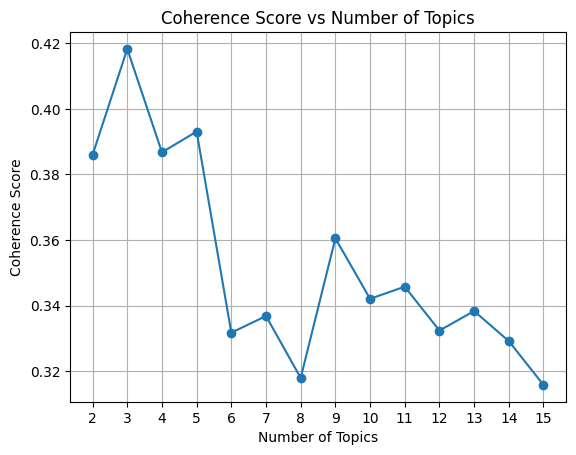

In [ ]:
import matplotlib.pyplot as plt

# Nilai Coherence Score
coherence_scores = [0.38596684326290187, 0.4182856375204573, 0.3867690619164359, 0.39308032723809816, 0.3317626664279923,
                    0.33685247405451335, 0.3179722677823549, 0.36054617801813865, 0.34209566481746745, 0.34580023600797594,
                    0.3324105254453518, 0.33836751113351327, 0.32920225744463777, 0.3158428511288887]

# Jumlah topik
num_topics = range(2, 16)

# Membuat grafik
plt.plot(num_topics, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.xticks(num_topics)
plt.grid(True)
plt.show()


Pemodelan Topik dengan LDA

In [ ]:
# Membuat model LDA dengan topik terbaik (3)
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3,)

# Menampilkan topik hasil pemodelan
topics = lda_model.show_topics(num_topics=3, num_words=30)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.025*"main" + 0.019*"juara" + 0.018*"argentina" + 0.016*"tim" + 0.015*"menang" + 0.015*"arab" + 0.013*"negara" + 0.013*"jerman" + 0.013*"saudi" + 0.012*"iran" + 0.011*"tampil" + 0.010*"messi" + 0.010*"buka" + 0.010*"laga" + 0.009*"jepang" + 0.009*"lawan" + 0.008*"ronaldo" + 0.007*"asia" + 0.006*"sejarah" + 0.006*"latih" + 0.006*"kalah" + 0.006*"hasil" + 0.006*"dukung" + 0.006*"bawa" + 0.006*"korea" + 0.005*"lolos" + 0.005*"cedera" + 0.005*"cetak" + 0.005*"jelang" + 0.005*"kejut"')
(1, '0.031*"tanding" + 0.020*"prediksi" + 0.020*"jadwal" + 0.019*"live" + 0.019*"link" + 0.018*"streaming" + 0.018*"benzema" + 0.018*"laga" + 0.016*"prancis" + 0.013*"buka" + 0.013*"nonton" + 0.012*"skor" + 0.011*"karim" + 0.011*"siar" + 0.010*"langsung" + 0.010*"lengkap" + 0.010*"absen" + 0.009*"sctv" + 0.009*"stadion" + 0.009*"perdana" + 0.008*"final" + 0.008*"informasi" + 0.008*"hasil" + 0.007*"babak" + 0.006*"gratis" + 0.006*"bandung" + 0.006*"tv" + 0.005*"hadap" + 0.005*"bayt" + 0.005*"jam"')
(2, '

Visualisasi PyLDAvis

In [ ]:
!pip install pyLDAvis -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


In [ ]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

# Membuat visualisasi dengan pyLDAvis

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Menampilkan visualisasi di dalam notebook
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
